# Jihan nur azizah
# 2009106081

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("netflix_titles.csv")

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df2 = pd.read_csv("league-of-spuds.csv")

In [6]:
df2

,accountId,name,summonerName,participantId,win,item0,item1,item2,item3,item4,...,perk4Var1,perk4Var2,perk4Var3,perk5,perk5Var1,perk5Var2,perk5Var3,perkPrimaryStyle,perkSubStyle,gameId
0,200394182,MJ,TheRoughead,7,True,3004,1055,3057,3101,3158,...,342.0,0.0,0.0,8014.0,215.0,0.0,0.0,8100.0,8000.0,213013310
1,200394182,MJ,TheRoughead,7,False,2420,1400,3134,3742,3117,...,574.0,0.0,0.0,8014.0,174.0,0.0,0.0,8100.0,8000.0,212863847
2,200394182,MJ,TheRoughead,4,False,3071,1400,3134,3117,3742,...,1372.0,0.0,0.0,8014.0,385.0,0.0,0.0,8100.0,8000.0,202426241
3,200394182,MJ,TheRoughead,2,False,3083,1400,3134,3117,3742,...,827.0,0.0,0.0,8014.0,254.0,0.0,0.0,8100.0,8000.0,202414594
4,200394182,MJ,TheRoughead,7,True,3078,1055,3004,1038,3158,...,334.0,0.0,0.0,8014.0,126.0,0.0,0.0,8100.0,8000.0,200395574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,200053490,Lach,patto33,4,False,3153,3087,1304,1018,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98774004
6294,200053490,Lach,patto33,5,True,3144,3110,3065,3020,3724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98771995
6295,200053490,Lach,patto33,3,True,3430,1056,3196,1001,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98763126
6296,200053490,Lach,patto33,9,True,1056,3027,3434,1001,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98758303


In [7]:
df3 = pd.read_csv("Anime_data.csv")

In [8]:
df3

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16997,27499,Sore Ike! Anpanman: Anpanman to Kaizoku Lobster,NaN,NaN,Special,NaN,NaN,5.50,NaN,NaN,70.0,NaN,NaN,NaN,NaN
16998,12091,X Bomber,NaN,NaN,TV,NaN,NaN,5.94,NaN,NaN,199.0,NaN,NaN,NaN,NaN
16999,29133,X Bomber Pilot,NaN,NaN,Special,NaN,NaN,4.28,NaN,NaN,77.0,NaN,NaN,NaN,NaN
17000,34485,Ganko-chan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN


In [9]:
dataset_cl1 = df.copy()
dataset_cl2 = df2.copy()
dataset_cl3 = df3.copy()

In [10]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

In [11]:
dataset_cl2['perkSubStyle'] = imputer_modus.fit_transform(dataset_cl2[['perkSubStyle']])

dataset_cl2.isna().sum()

accountId              0
name                   0
summonerName           0
participantId          0
win                    0
                    ... 
perk5Var2           5456
perk5Var3           5456
perkPrimaryStyle    5456
perkSubStyle           0
gameId                 0
Length: 105, dtype: int64

In [12]:
dataset_cl2['perk5Var3'] = imputer_mean.fit_transform(dataset_cl2[['perk5Var3']])

dataset_cl2.isna().sum()

accountId              0
name                   0
summonerName           0
participantId          0
win                    0
                    ... 
perk5Var2           5456
perk5Var3              0
perkPrimaryStyle    5456
perkSubStyle           0
gameId                 0
Length: 105, dtype: int64

In [13]:
dataset_cl2.dropna(inplace=True)

dataset_cl2.isna().sum()

accountId           0
name                0
summonerName        0
participantId       0
win                 0
                   ..
perk5Var2           0
perk5Var3           0
perkPrimaryStyle    0
perkSubStyle        0
gameId              0
Length: 105, dtype: int64

In [14]:
dataset_duplicate = df2.copy()

dataset_duplicate.duplicated().sum()

0

In [15]:
dataset_duplicate.drop_duplicates(inplace=True)

dataset_duplicate.duplicated().sum()

0

# K- means

In [16]:
dataset_cl2.head()

,accountId,name,summonerName,participantId,win,item0,item1,item2,item3,item4,...,perk4Var1,perk4Var2,perk4Var3,perk5,perk5Var1,perk5Var2,perk5Var3,perkPrimaryStyle,perkSubStyle,gameId
0,200394182,MJ,TheRoughead,7,True,3004,1055,3057,3101,3158,...,342.0,0.0,0.0,8014.0,215.0,0.0,0.0,8100.0,8000.0,213013310
1,200394182,MJ,TheRoughead,7,False,2420,1400,3134,3742,3117,...,574.0,0.0,0.0,8014.0,174.0,0.0,0.0,8100.0,8000.0,212863847
2,200394182,MJ,TheRoughead,4,False,3071,1400,3134,3117,3742,...,1372.0,0.0,0.0,8014.0,385.0,0.0,0.0,8100.0,8000.0,202426241
3,200394182,MJ,TheRoughead,2,False,3083,1400,3134,3117,3742,...,827.0,0.0,0.0,8014.0,254.0,0.0,0.0,8100.0,8000.0,202414594
4,200394182,MJ,TheRoughead,7,True,3078,1055,3004,1038,3158,...,334.0,0.0,0.0,8014.0,126.0,0.0,0.0,8100.0,8000.0,200395574


In [17]:
dataset_cl2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 4193
Columns: 105 entries, accountId to gameId
dtypes: bool(1), float64(32), int64(64), object(8)
memory usage: 418.0+ KB


In [18]:
model = KMeans(n_clusters=4)

In [20]:
point = dataset_cl2[['item0','item1']]

In [21]:
model.fit(point)

KMeans(n_clusters=4)

In [22]:
label = model.labels_

In [23]:
label

array([2, 2, 2, 2, 2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 3, 1, 0, 1, 2, 2,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 0, 3, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 0, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 3, 0, 1, 3,
       3, 1, 3, 0, 3, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1,
       1, 0, 3, 3, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       1, 3, 1, 3, 1, 1, 1, 0, 0, 1, 3, 0, 2, 1, 1,

In [24]:
X = point['item0']
Y = point['item1']

In [25]:
centroid = model.cluster_centers_

In [26]:
centroid

array([[3210.57317073, 3134.87804878],
       [1322.17674419, 3123.42790698],
       [3227.87341772, 1561.93670886],
       [1380.05882353, 1718.88235294]])

In [27]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

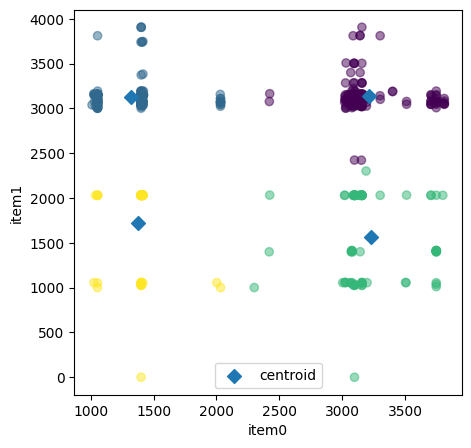

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(X, Y, alpha=0.5, c=label)
plt.scatter(centroid_X, centroid_Y, marker='D', s=50, label='centroid')
plt.xlabel('item0')
plt.ylabel('item1')
plt.legend()
plt.show()

In [30]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)

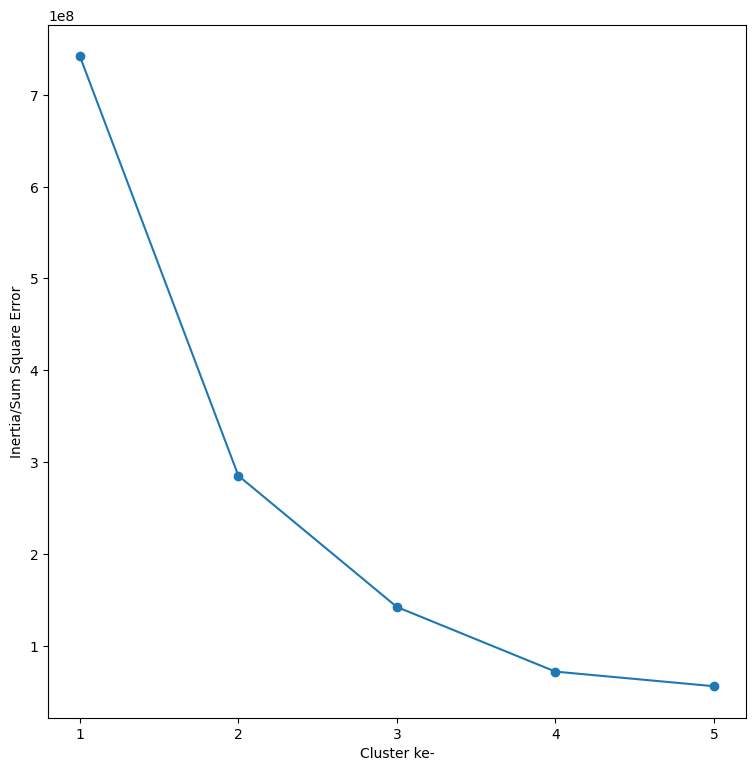

In [32]:
plt.figure(figsize=(9,9))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('Inertia/Sum Square Error')
plt.xticks(cluster_range)
plt.show()